In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.pipeline import Pipeline
import category_encoders as ce
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, f1_score, accuracy_score

In [2]:
!pip install scikit-learn

In [4]:
df = pd.read_csv('googleplaystore.csv')
df.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8037,CX-10WiFi,FAMILY,4.0,1419,12M,"100,000+",Free,0,Everyone,Casual,"October 25, 2017",2.5_16,4.0 and up
10054,Aurum Blade EX,FAMILY,4.3,28151,17M,"1,000,000+",Free,0,Everyone 10+,Role Playing,"June 4, 2015",1.0.2,2.2 and up
2317,Anthem Anywhere,MEDICAL,2.7,2657,24M,"500,000+",Free,0,Everyone,Medical,"July 27, 2018",8.0.226,4.4 and up
8400,DEER HUNTER RELOADED,GAME,4.3,314774,43M,"5,000,000+",Free,0,Teen,Action,"September 16, 2013",3.8.2,2.1 and up
3582,Favorite children's songs,PARENTING,4.7,39,95M,"10,000+",Free,0,Everyone,Parenting,"July 6, 2018",1.2.5,4.2 and up
6363,Read it easy for BK,LIFESTYLE,5.0,1,3.2M,50+,Free,0,Everyone,Lifestyle,"July 15, 2018",1.2,4.1 and up
1247,Caviar - Food Delivery,FOOD_AND_DRINK,4.2,3755,8.5M,"100,000+",Free,0,Everyone,Food & Drink,"July 20, 2018",2.4.11,6.0 and up
5068,AF Our Time to Shine,BUSINESS,NaN,0,11M,100+,Free,0,Everyone,Business,"July 17, 2017",v2.7.10.6,4.1 and up
9907,E.U. Trademark Search Tool,BUSINESS,NaN,0,3.1M,10+,Free,0,Everyone,Business,"March 29, 2018",1.5,4.0.3 and up
9262,EC-Contractors,HOUSE_AND_HOME,NaN,0,6.0M,1+,Free,0,Everyone,House & Home,"April 25, 2018",14.01,4.0.3 and up


In [5]:
df.shape

(10841, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
df.drop(columns=['Current Ver','Android Ver','Size','Last Updated'],inplace=True)

In [8]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
dtype: int64

In [9]:
df[df['Content Rating'] == 'Mature 17+']

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,"10,000+",Free,0,Mature 17+,Beauty
133,Dresses Ideas & Fashions +3000,BEAUTY,4.5,473,"100,000+",Free,0,Mature 17+,Beauty
134,"Lady adviser (beauty, health)",BEAUTY,NaN,30,"10,000+",Free,0,Mature 17+,Beauty
166,Read books online,BOOKS_AND_REFERENCE,4.1,91615,"5,000,000+",Free,0,Mature 17+,Books & Reference
170,Flybook,BOOKS_AND_REFERENCE,3.9,1778,"500,000+",Free,0,Mature 17+,Books & Reference
...,...,...,...,...,...,...,...,...,...
10735,FP VoiceBot,FAMILY,NaN,17,100+,Paid,$0.99,Mature 17+,Entertainment
10765,Chat For Strangers - Video Chat,SOCIAL,3.4,622,"100,000+",Free,0,Mature 17+,Social
10783,Modern Counter Terror Attack – Shooting Game,GAME,4.2,340,"50,000+",Free,0,Mature 17+,Action
10826,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486,"5,000,000+",Free,0,Mature 17+,Social


In [10]:
df.duplicated().sum()

485

Reviews To Install Ratio
App Age = Today - LastUpdated (Datetime)

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.dropna(subset=['Rating','Type','Content Rating'],inplace=True)

In [13]:
df.shape

(8890, 9)

In [14]:
import string

In [15]:
df['Installs'] = df['Installs'].str.replace('+','').str.replace(',','').astype(dtype=np.int64)

In [16]:
df['Reviews'] = df['Reviews'].astype(dtype=np.int64)

In [17]:
df['Installs_to_reviews_ratio'] = df['Installs']/df['Reviews']

In [18]:
df.sample(10)

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Installs_to_reviews_ratio
10030,Bike Race - Bike Blast Rush,GAME,4.4,83891,10000000,Free,0,Everyone,Action,119.202298
6684,B R Telco FCU Mobile Banking,FINANCE,4.7,413,10000,Free,0,Everyone,Finance,24.213075
9822,School scientific calculator fx 500 es plus 50...,FAMILY,4.6,1553,100000,Free,0,Everyone,Education,64.391500
4468,Theme Android P Black for LG G7 & V35,PERSONALIZATION,4.6,5,100,Paid,$1.49,Everyone,Personalization,20.000000
1370,"Zombies, Run! 5k Training (Free)",HEALTH_AND_FITNESS,4.0,267,50000,Free,0,Teen,Health & Fitness,187.265918
6405,Cerulean Heart,FAMILY,4.6,2683,10000,Free,0,Mature 17+,Simulation,3.727171
1814,Ice Crush 2018 - A new Puzzle Matching Adventure,GAME,4.6,15403,1000000,Free,0,Everyone,Casual,64.922418
8591,DN Blog,SOCIAL,5.0,20,10,Free,0,Teen,Social,0.500000
4665,SAY-U,FAMILY,3.2,1011,100000,Free,0,Teen,Entertainment,98.911968
3614,Rainbow - Journal & Activities,PARENTING,4.8,6668,100000,Free,0,Everyone,Parenting,14.997001


In [19]:
df['Content Rating'].value_counts()

Content Rating
Everyone           7093
Teen               1022
Mature 17+          411
Everyone 10+        360
Adults only 18+       3
Unrated               1
Name: count, dtype: int64

In [20]:
df['Content Rating']=df['Content Rating'].str.replace('Everyone 10+','Teen').str.replace('Unrated','Everyone')

In [21]:
df.drop(df[df['Content Rating'] == "Adults only 18+"].index, inplace = True)

In [22]:
df['Content Rating'].value_counts()

Content Rating
Everyone      7094
Teen          1382
Mature 17+     411
Name: count, dtype: int64

In [23]:
df['Price']=df['Price'].str.replace('$','').astype(dtype=float)

In [24]:
df.rename(columns={'Price': 'Price($)'}, inplace=True)


In [25]:
df.value_counts('Type')

Type
Free    8274
Paid     613
Name: count, dtype: int64

Success = Installs >1M  And Rating > 3.8

In [26]:
df['Success']= ((df['Rating'] >=3.8) & (df['Installs'] >=1000000)).astype(np.int64)

In [27]:
df.sample(5)

,App,Category,Rating,Reviews,Installs,Type,Price($),Content Rating,Genres,Installs_to_reviews_ratio,Success
3629,Live Weather Pro,WEATHER,4.8,892,10000,Free,0.00,Everyone,Weather,11.210762,0
5348,Surah Al-Waqiah,BOOKS_AND_REFERENCE,4.7,1201,100000,Free,0.00,Everyone,Books & Reference,83.263947,0
8592,Dagens Nyheter,NEWS_AND_MAGAZINES,2.5,2055,100000,Free,0.00,Everyone,News & Magazines,48.661800,0
4554,R-TYPE,GAME,4.5,7687,100000,Paid,1.99,Everyone,Arcade,13.008976,0
6412,Gaydorado,FAMILY,3.9,8419,100000,Free,0.00,Teen,Role Playing,11.877895,0


In [28]:
df["Category"].nunique()

33

In [29]:
df["Genres"].nunique()

115

In [30]:
df_grouped2 = df.groupby(['Category','Genres'], as_index = False).count()
df_grouped2['Category'].value_counts().sum()

144

In [31]:
df['reviews_to_Installs_ratio'] = df['Reviews']/df['Installs']

In [32]:
df[['Price($)','Success','Rating','Reviews','Installs','Installs_to_reviews_ratio','reviews_to_Installs_ratio']].corr()

,Price($),Success,Rating,Reviews,Installs,Installs_to_reviews_ratio,reviews_to_Installs_ratio
Price($),1.000000,-0.050417,-0.022353,-0.009563,-0.011334,-0.003499,0.025636
Success,-0.050417,1.000000,0.236220,0.186598,0.213531,-0.012475,-0.042077
Rating,-0.022353,0.236220,1.000000,0.068746,0.050903,-0.042746,0.189769
Reviews,-0.009563,0.186598,0.068746,1.000000,0.633425,-0.008355,0.067064
Installs,-0.011334,0.213531,0.050903,0.633425,1.000000,0.006840,-0.021004
Installs_to_reviews_ratio,-0.003499,-0.012475,-0.042746,-0.008355,0.006840,1.000000,-0.025756
reviews_to_Installs_ratio,0.025636,-0.042077,0.189769,0.067064,-0.021004,-0.025756,1.000000


In [33]:
df.sample(10)

,App,Category,Rating,Reviews,Installs,Type,Price($),Content Rating,Genres,Installs_to_reviews_ratio,Success,reviews_to_Installs_ratio
2383,Davis's Drug Guide,MEDICAL,3.9,272,50000,Free,0.0,Everyone,Medical,183.823529,0,0.005440
2019,Mahjong,FAMILY,4.5,33983,5000000,Free,0.0,Everyone,Puzzle;Brain Games,147.132390,1,0.006797
2939,Photo Collage Editor,PHOTOGRAPHY,4.2,1028637,100000000,Free,0.0,Everyone,Photography,97.216025,1,0.010286
8978,"DW Learn German - A1, A2, B1 and placement test",FAMILY,4.3,902,100000,Free,0.0,Everyone,Education,110.864745,0,0.009020
9975,Home Workout - No Equipment,HEALTH_AND_FITNESS,4.8,432160,10000000,Free,0.0,Everyone,Health & Fitness,23.139578,1,0.043216
2548,Tumblr,SOCIAL,4.4,2955326,100000000,Free,0.0,Mature 17+,Social,33.837215,1,0.029553
10526,Fairy Kingdom: World of Magic and Farming,FAMILY,4.4,129542,1000000,Free,0.0,Everyone,Strategy;Creativity,7.719504,1,0.129542
5085,AG Drive 3D,GAME,3.8,164,10000,Free,0.0,Everyone,Adventure,60.975610,0,0.016400
8615,ES Remote,FAMILY,3.3,707,100000,Free,0.0,Everyone,Entertainment,141.442716,0,0.007070
8892,dt.se,NEWS_AND_MAGAZINES,3.1,124,10000,Free,0.0,Everyone,News & Magazines,80.645161,0,0.012400


In [34]:
df[["Success",'Rating','Reviews','Installs']].corr()

,Success,Rating,Reviews,Installs
Success,1.000000,0.236220,0.186598,0.213531
Rating,0.236220,1.000000,0.068746,0.050903
Reviews,0.186598,0.068746,1.000000,0.633425
Installs,0.213531,0.050903,0.633425,1.000000


In [35]:
df.drop(columns = ['Price($)'],inplace = True)

In [36]:
df.drop(columns = ['reviews_to_Installs_ratio'],inplace = True)

In [37]:
df.sample()

,App,Category,Rating,Reviews,Installs,Type,Content Rating,Genres,Installs_to_reviews_ratio,Success
7091,CA Auth ID,TOOLS,3.8,39,10000,Free,Teen,Tools,256.410256,0


In [38]:
df.drop(columns = ['Installs_to_reviews_ratio'],inplace = True)

EDA

<Axes: xlabel='Rating', ylabel='Density'>

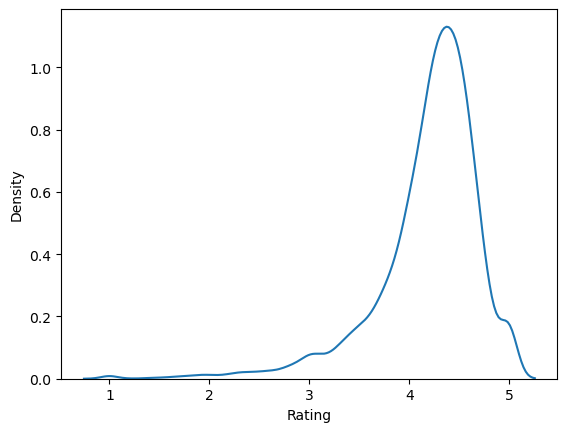

In [39]:
sns.kdeplot(data = df, x = 'Rating')

<Axes: xlabel='Reviews', ylabel='Density'>

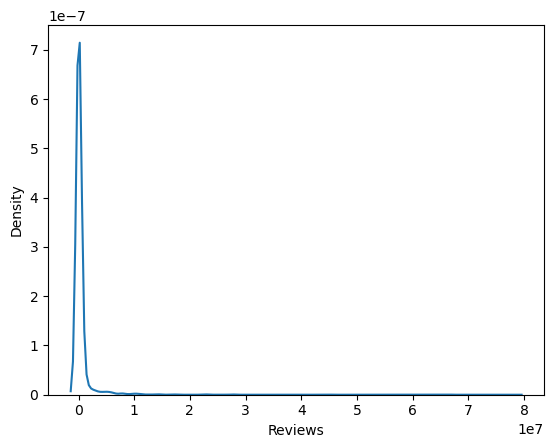

In [40]:
sns.kdeplot(data = df, x = 'Reviews')

In [41]:
df['Reviews'] = np.log1p(df['Reviews'])

<Axes: xlabel='Reviews', ylabel='Density'>

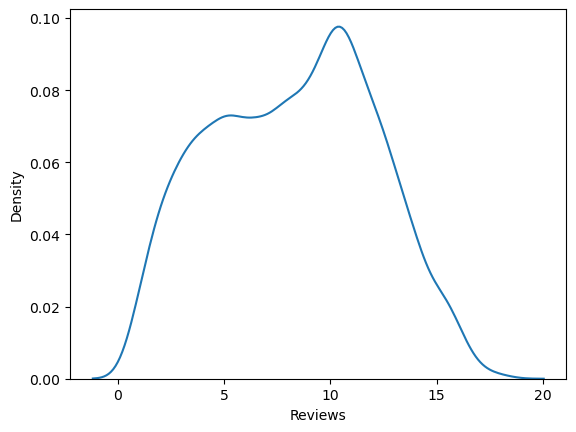

In [42]:
sns.kdeplot(data = df, x = 'Reviews')

<Axes: xlabel='Installs', ylabel='Density'>

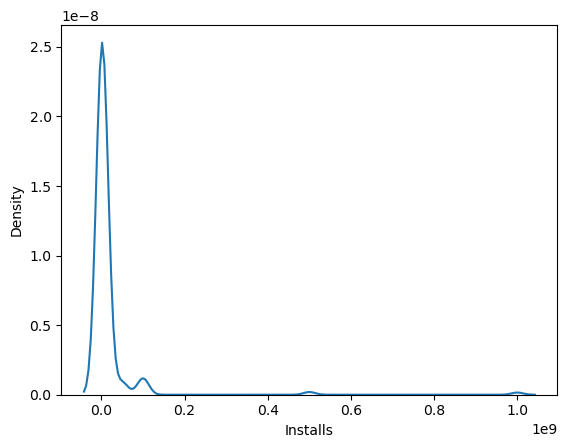

In [43]:
sns.kdeplot(data = df, x = 'Installs')

In [44]:
df['Installs'] = np.log1p(df['Installs'])

<Axes: xlabel='Installs', ylabel='Density'>

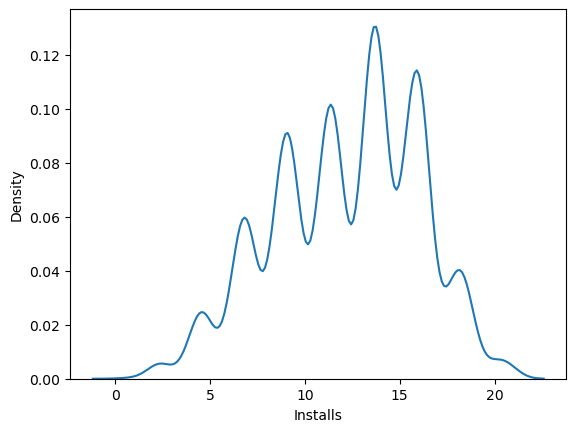

In [45]:
sns.kdeplot(data = df, x = 'Installs')

In [46]:
df[['Success',"Reviews","Installs","Rating"]].corr()

,Success,Reviews,Installs,Rating
Success,1.000000,0.798505,0.781201,0.236220
Reviews,0.798505,1.000000,0.956684,0.207833
Installs,0.781201,0.956684,1.000000,0.114907
Rating,0.236220,0.207833,0.114907,1.000000


<Axes: ylabel='Installs'>

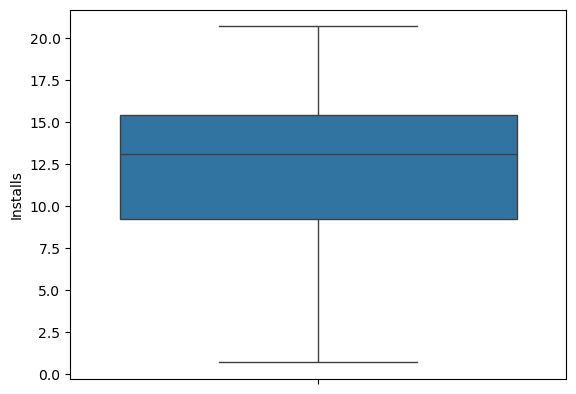

In [47]:
sns.boxplot(df['Installs'])

<Axes: ylabel='Reviews'>

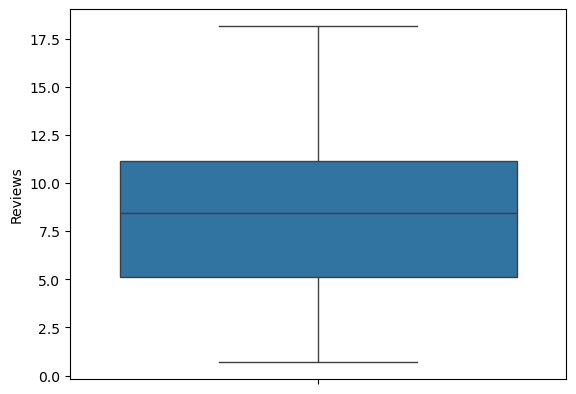

In [48]:
sns.boxplot(df['Reviews'])

C:\Users\asus\AppData\Local\Temp\ipykernel_10256\2160066058.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Rating'])


<Axes: xlabel='Rating', ylabel='Density'>

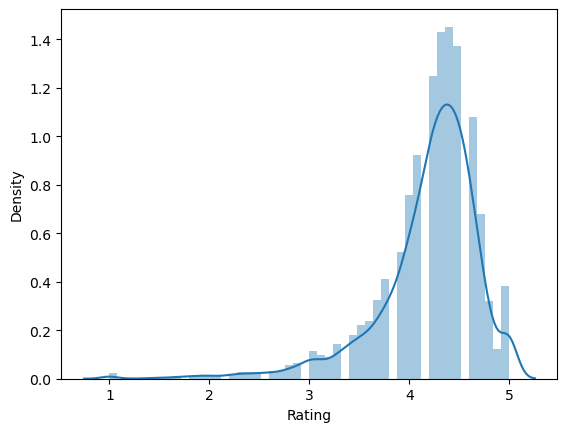

In [49]:
sns.distplot(df['Rating'])

In [50]:
print("Mean value of Rating",df['Rating'].mean())
print("Std value of Rating",df['Rating'].std())
print("Min value of Rating",df['Rating'].min())
print("Max value of Rating",df['Rating'].max())

Mean value of Rating 4.187847417576236
Std value of Rating 0.522477813519274
Min value of Rating 1.0
Max value of Rating 5.0


In [51]:
# Finding the boundary values
upper_limit = df['Rating'].mean() + 3*df['Rating'].std()
lower_limit = df['Rating'].mean() - 3*df['Rating'].std()

In [52]:
lower_limit = 2.6

In [53]:
# Finding the outliers
df[(df['Rating'] > upper_limit) | (df['Rating'] < lower_limit)]

,App,Category,Rating,Reviews,Installs,Type,Content Rating,Genres,Success
518,Just She - Top Lesbian Dating,DATING,1.9,6.860664,11.512935,Free,Mature 17+,Dating,0
520,EliteSingles – Dating for Single Professionals,DATING,2.5,8.590072,13.122365,Free,Mature 17+,Dating,0
527,Sugar Daddy Dating App,DATING,2.5,5.627621,11.512935,Free,Mature 17+,Dating,0
625,House party - live chat,DATING,1.0,0.693147,2.397895,Free,Mature 17+,Dating,0
663,Just She - Top Lesbian Dating,DATING,1.9,6.861711,11.512935,Free,Mature 17+,Dating,0
...,...,...,...,...,...,...,...,...,...
10458,Candy simply-Fi,LIFESTYLE,2.1,7.779467,11.512935,Free,Everyone,Lifestyle,0
10562,FK Atlantas,SPORTS,1.5,1.098612,1.791759,Free,Everyone,Sports,0
10578,Check Lottery Tickets - Florida,FAMILY,2.0,3.332205,8.517393,Free,Teen,Entertainment,0
10591,Lottery Ticket Checker - Florida Results & Lotto,TOOLS,1.0,1.386294,6.216606,Free,Everyone,Tools,0


Capping outlier

In [54]:
df['Rating'] = np.where(
    df['Rating']>upper_limit,
    upper_limit,
    np.where(
        df['Rating']<lower_limit,
        lower_limit,
        df['Rating']
    )
)

C:\Users\asus\AppData\Local\Temp\ipykernel_10256\2160066058.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Rating'])


<Axes: xlabel='Rating', ylabel='Density'>

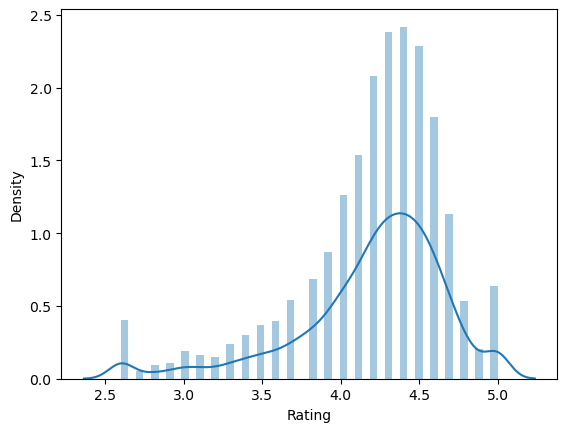

In [55]:
sns.distplot(df['Rating'])

Success Distribuion

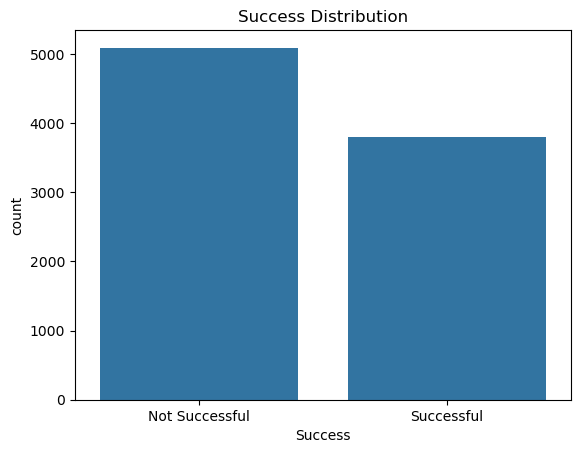

In [56]:
sns.countplot(data=df, x='Success')
plt.title('Success Distribution')
plt.xticks([0, 1], ['Not Successful', 'Successful'])
plt.show()

Rating Vs Success

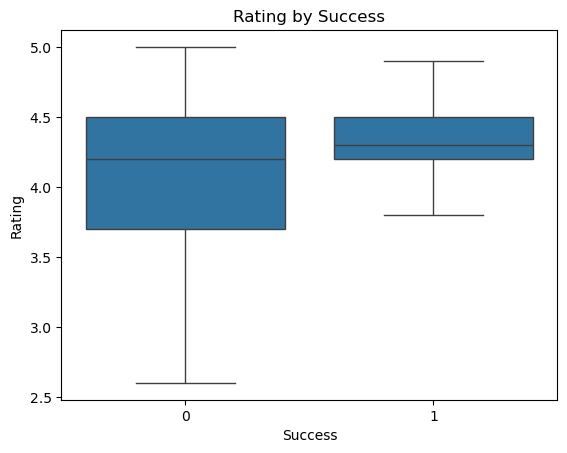

In [57]:
sns.boxplot(data=df, x='Success', y='Rating')
plt.title('Rating by Success')
plt.show()

Installs Vs Success

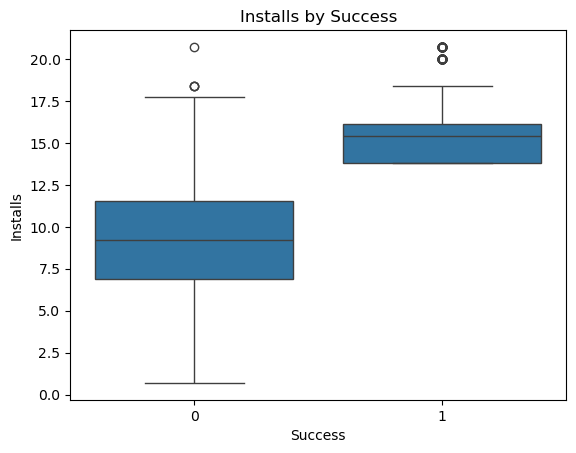

In [58]:
sns.boxplot(data=df, x='Success', y='Installs')
plt.title('Installs by Success')
plt.show()

Reviews Vs Success

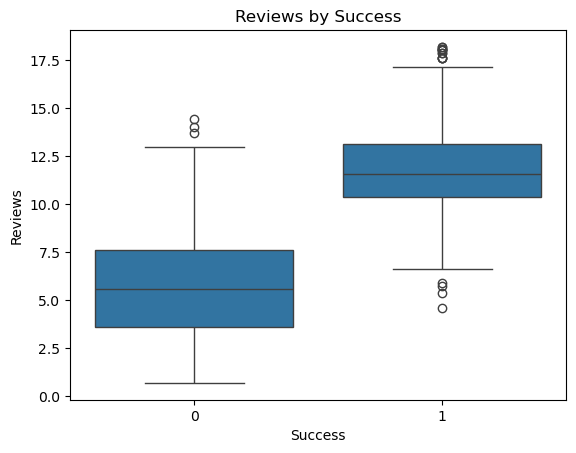

In [59]:
sns.boxplot(data=df, x='Success', y='Reviews')
plt.title('Reviews by Success')
plt.show()

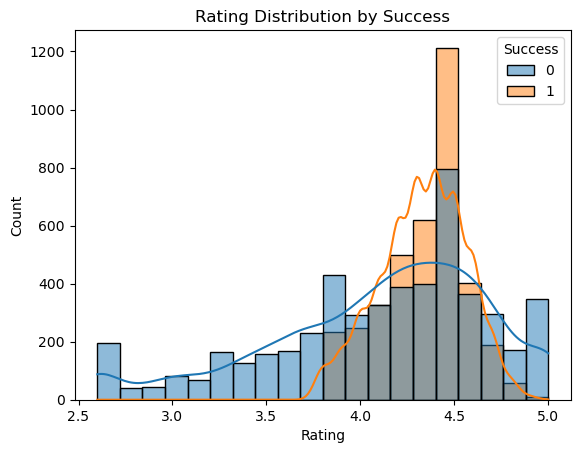

In [60]:
# Distribution of ratings
sns.histplot(data=df, x='Rating', hue='Success', kde=True, bins=20)
plt.title('Rating Distribution by Success')
plt.show()

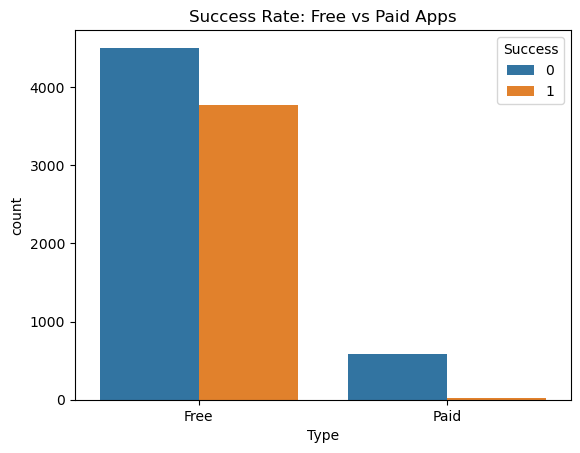

In [61]:
sns.countplot(data=df, x='Type', hue='Success')
plt.xticks([0, 1], ['Free', 'Paid'])
plt.title('Success Rate: Free vs Paid Apps')
plt.show()

In [62]:
df.sample()

,App,Category,Rating,Reviews,Installs,Type,Content Rating,Genres,Success
8022,Morse Code Reader,COMMUNICATION,3.9,7.270313,11.512935,Free,Everyone,Communication,0


In [63]:
df['Type'].value_counts()

Type
Free    8274
Paid     613
Name: count, dtype: int64

In [64]:
top_categories = df['Category'].value_counts().head(10).index
filtered_df = df[df['Category'].isin(top_categories)]

Category Analysis

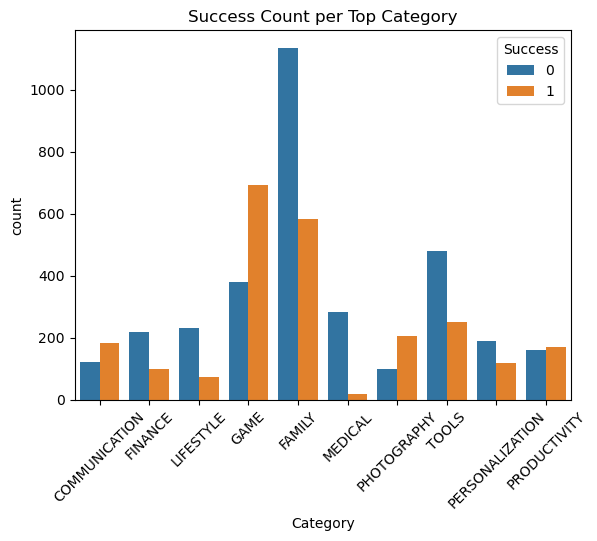

In [65]:
sns.countplot(data=filtered_df, x='Category', hue='Success')
plt.xticks(rotation=45)
plt.title('Success Count per Top Category')
plt.show()

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8887 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8887 non-null   object 
 1   Category        8887 non-null   object 
 2   Rating          8887 non-null   float64
 3   Reviews         8887 non-null   float64
 4   Installs        8887 non-null   float64
 5   Type            8887 non-null   object 
 6   Content Rating  8887 non-null   object 
 7   Genres          8887 non-null   object 
 8   Success         8887 non-null   int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 694.3+ KB


Model Training

In [174]:
X = df.drop(columns = ['App','Success'])
y = df['Success']

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X , y , random_state = 42, test_size=0.3)

In [176]:
num_feature = ['Rating','Reviews','Installs']

In [177]:
transformer = ColumnTransformer( transformers = [
    ('scaler',StandardScaler(),num_feature),
    ('onehotencoder',OneHotEncoder(drop = 'first',handle_unknown='ignore',sparse_output=False),['Category','Type','Content Rating']),
    ('TargetEncoder',ce.TargetEncoder(cols = ['Genres']),["Genres"])
],remainder='passthrough')

In [179]:
pipe = Pipeline(steps = [
    ('transformer',transformer),
    ('LogesticRegression',LogisticRegression(max_iter = 100))
])

In [180]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  ['Rating', 'Reviews',
                                                   'Installs']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Category', 'Type',
                                                   'Content Rating']),
                                                 ('TargetEncoder',
                                                  TargetEncoder(cols=['Genres']),
                                                  ['Genres'])])),
                ('LogesticRegression', LogisticRegression())])

In [181]:
y_pred = pipe.predict(X_test)

In [182]:
f1 = f1_score(y_test, y_pred)
f1

0.9551979121357111

In [183]:
accuracy_score(y_test, y_pred)

0.9613798275215598

In [184]:
train_accuracy = pipe.score(X_train, y_train)
train_accuracy

0.9543408360128617